In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Define the universe of discourse for each variable
income = ctrl.Antecedent(np.arange(0, 100001, 1000), 'income')
debt_to_income = ctrl.Antecedent(np.arange(0, 101, 1), 'debt_to_income')
credit_score = ctrl.Antecedent(np.arange(300, 851, 1), 'credit_score')
risk = ctrl.Consequent(np.arange(0, 11, 1), 'risk')

In [4]:
# Define fuzzy membership functions for Income
income['low'] = fuzz.trimf(income.universe, [0, 0, 50000])
income['medium'] = fuzz.trimf(income.universe, [20000, 50000, 80000])
income['high'] = fuzz.trimf(income.universe, [30000, 100000, 100000])

In [5]:
# Define fuzzy membership functions for Debt-to-Income Ratio
debt_to_income['low'] = fuzz.trimf(debt_to_income.universe, [0, 0, 40])
debt_to_income['medium'] = fuzz.trimf(debt_to_income.universe, [20, 50, 80])
debt_to_income['high'] = fuzz.trimf(debt_to_income.universe, [60, 100, 100])

In [6]:
# Define fuzzy membership functions for Credit Score
credit_score['low'] = fuzz.trimf(credit_score.universe, [300, 300, 600])
credit_score['medium'] = fuzz.trimf(credit_score.universe, [500, 650, 750])
credit_score['high'] = fuzz.trimf(credit_score.universe, [700, 850, 850])

In [7]:
# Define fuzzy membership functions for Risk Score
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 5])
risk['medium'] = fuzz.trimf(risk.universe, [3, 5, 7])
risk['high'] = fuzz.trimf(risk.universe, [5, 10, 10])

In [8]:
# Define rules
rule1 = ctrl.Rule(income['high'] & debt_to_income['low'] & credit_score['high'], risk['low'])
rule2 = ctrl.Rule(income['low'] & debt_to_income['high'] & credit_score['low'], risk['high'])
rule3 = ctrl.Rule(income['medium'] & debt_to_income['medium'] & credit_score['medium'], risk['medium'])
rule4 = ctrl.Rule(income['high'] & debt_to_income['high'] & credit_score['medium'], risk['medium'])
rule5 = ctrl.Rule(income['low'] & debt_to_income['low'] & credit_score['high'], risk['low'])
rule6 = ctrl.Rule(income['medium'] & debt_to_income['high'] & credit_score['low'], risk['high'])

In [9]:
# Create the control system and simulation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

In [10]:
# Set the inputs and show exact values
input_values = {
    'income': 45000,
    'debt_to_income': 50,
    'credit_score': 650
}
risk_simulation.input['income'] = input_values['income']
risk_simulation.input['debt_to_income'] = input_values['debt_to_income']
risk_simulation.input['credit_score'] = input_values['credit_score']

print("### Step 1: Input Values ###")
print(f"Income: {input_values['income']}")
print(f"Debt-to-Income Ratio: {input_values['debt_to_income']}")
print(f"Credit Score: {input_values['credit_score']}")

### Step 1: Input Values ###
Income: 45000
Debt-to-Income Ratio: 50
Credit Score: 650


In [11]:
# Fuzzify input values
income_membership_low = fuzz.interp_membership(income.universe, income['low'].mf, input_values['income'])
income_membership_medium = fuzz.interp_membership(income.universe, income['medium'].mf, input_values['income'])
income_membership_high = fuzz.interp_membership(income.universe, income['high'].mf, input_values['income'])

dti_membership_low = fuzz.interp_membership(debt_to_income.universe, debt_to_income['low'].mf, input_values['debt_to_income'])
dti_membership_medium = fuzz.interp_membership(debt_to_income.universe, debt_to_income['medium'].mf, input_values['debt_to_income'])
dti_membership_high = fuzz.interp_membership(debt_to_income.universe, debt_to_income['high'].mf, input_values['debt_to_income'])

credit_membership_low = fuzz.interp_membership(credit_score.universe, credit_score['low'].mf, input_values['credit_score'])
credit_membership_medium = fuzz.interp_membership(credit_score.universe, credit_score['medium'].mf, input_values['credit_score'])
credit_membership_high = fuzz.interp_membership(credit_score.universe, credit_score['high'].mf, input_values['credit_score'])

print("\n### Step 2: Fuzzification Values ###")
print(f"Income (Low): {income_membership_low:.2f}, Income (Medium): {income_membership_medium:.2f}, Income (High): {income_membership_high:.2f}")
print(f"Debt-to-Income Ratio (Low): {dti_membership_low:.2f}, Debt-to-Income Ratio (Medium): {dti_membership_medium:.2f}, Debt-to-Income Ratio (High): {dti_membership_high:.2f}")
print(f"Credit Score (Low): {credit_membership_low:.2f}, Credit Score (Medium): {credit_membership_medium:.2f}, Credit Score (High): {credit_membership_high:.2f}")


### Step 2: Fuzzification Values ###
Income (Low): 0.10, Income (Medium): 0.83, Income (High): 0.21
Debt-to-Income Ratio (Low): 0.00, Debt-to-Income Ratio (Medium): 1.00, Debt-to-Income Ratio (High): 0.00
Credit Score (Low): 0.00, Credit Score (Medium): 1.00, Credit Score (High): 0.00


In [12]:
# Compute the result
risk_simulation.compute()

# Display the risk score
calculated_risk_score = risk_simulation.output['risk']
print("\n### Step 3: Defuzzified Risk Score ###")
print(f"Calculated Risk Score: {calculated_risk_score:.2f}")


### Step 3: Defuzzified Risk Score ###
Calculated Risk Score: 5.00


/Users/nicolasliebau/.virtualenvs/DS-ML/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


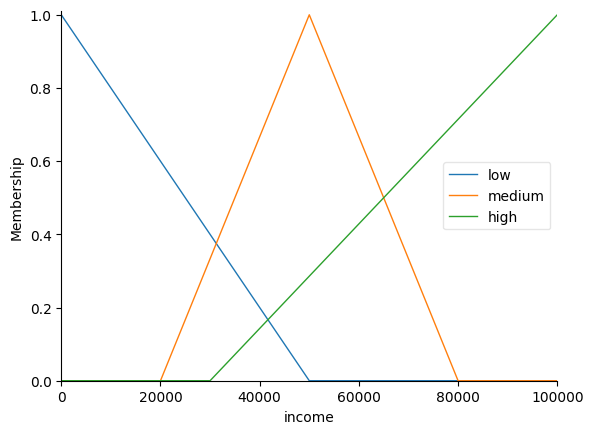

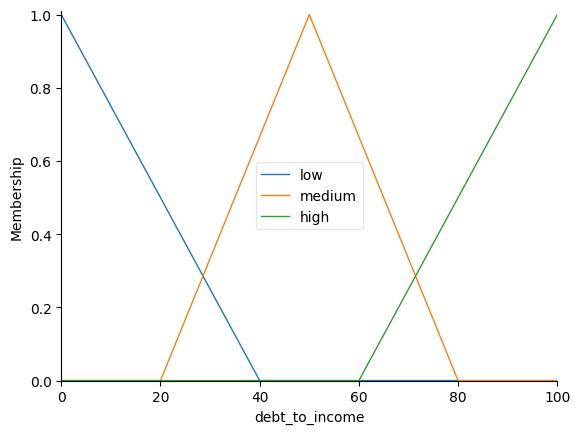

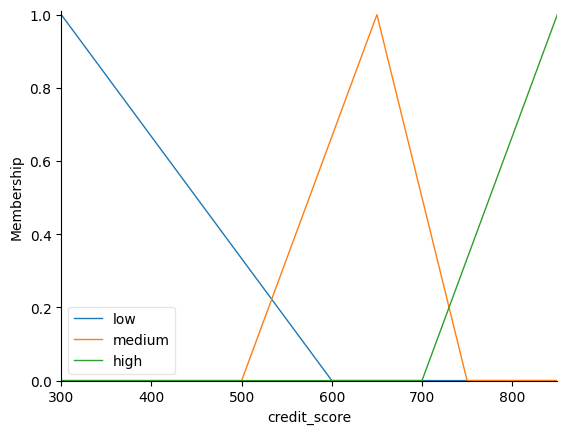

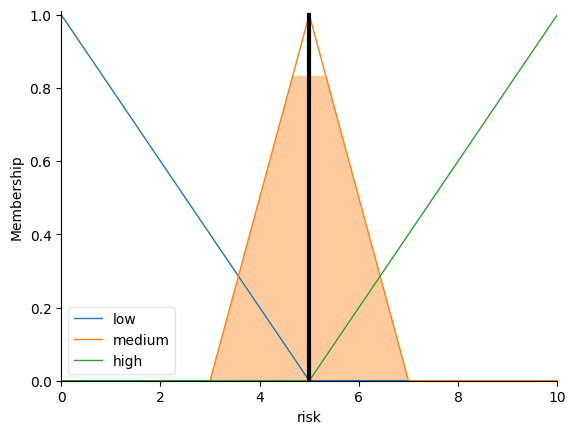

In [13]:
# Visualize the result
income.view()
debt_to_income.view()
credit_score.view()
risk.view(sim=risk_simulation)

Explanation of the code:

Definition of the input variables (income, debt_to_income, and credit_score) and the output variable (risk):

The universe of discourse for each variable specifies the range of possible values:
income: From 0 to 100,000 with steps of 1,000
debt_to_income: From 0 to 100 with steps of 1
credit_score: From 300 to 850 with steps of 1
risk: From 0 to 10 with steps of 1

Definition of the membership functions for income:

'low': A triangular function peaking at 0 and tapering off at 50,000
'medium': A triangular function centered at 50,000, spanning from 20,000 to 80,000
'high': A triangular function starting at 30,000 and peaking at 100,000

Definition of the membership functions for debt_to_income:

'low': Triangular function peaking at 0 and tapering off at 40
'medium': Triangular function centered at 50, spanning from 20 to 80
'high': Triangular function peaking at 100, starting at 60

Definition of the membership functions for credit_score:

'low': Triangular function peaking at 300 and tapering off at 600
'medium': Triangular function centered at 650, spanning from 500 to 750
'high': Triangular function peaking at 850, starting at 700

Definition of the membership functions for the output risk:

'low': Triangular function peaking at 0 and tapering off at 5
'medium': Triangular function centered at 5, spanning from 3 to 7
'high': Triangular function peaking at 10, starting at 5

Rules definition of how different combinations of input membership categories map to the output categories:

Rule 1: High income, low debt-to-income, and high credit score imply low risk
Rule 2: Low income, high debt-to-income, and low credit score imply high risk
Rule 3: Medium values for all inputs imply medium risk
Rule 4: High income and debt-to-income with medium credit score imply medium risk
Rule 5: Low income and debt-to-income with high credit score imply low risk
Rule 6: Medium income, high debt-to-income, and low credit score imply high risk